In [ ]:
#Kết Nối Colab với Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Thư viện

In [ ]:
!pip install matplotlib
!pip install numpy
!pip install scikit_learn
!pip install scipy
!pip install pandas
!pip install ipywidgets
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import math
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Các loại phân cụm:
* **Phân cụm dựa trên centroid**: Loại thuật toán phân cụm này hình thành xung quanh trọng tâm của các điểm dữ liệu. Ví dụ: Phân cụm K-Means , phân cụm K-Mode
* **Phân cụm dựa trên phân phối** : Loại thuật toán phân cụm này được mô hình hóa bằng phân phối thống kê. Nó giả định rằng các điểm dữ liệu trong một cụm được tạo từ một phân bố xác suất cụ thể và thuật toán nhằm mục đích ước tính các tham số của phân phối để nhóm các điểm dữ liệu tương tự thành các cụm Ví dụ: Mô hình hỗn hợp Gaussian (GMM)
* **Phân cụm dựa trên mật độ**: Loại thuật toán phân cụm này nhóm các điểm dữ liệu có nồng độ mật độ cao lại với nhau và phân tách các điểm ở các vùng có nồng độ thấp. Ý tưởng cơ bản là nó xác định các vùng trong không gian dữ liệu có mật độ điểm dữ liệu cao và nhóm các điểm đó lại với nhau thành các cụm. Ví dụ: DBSCAN(Phân cụm không gian dựa trên mật độ các ứng dụng có nhiễu).

* **Phân cụm theo cấp bậc**: mô hình phân cụm dựa trên kết nối, nhóm các điểm dữ liệu gần nhau dựa trên thước đo độ tương tự hoặc khoảng cách. Giả định là các điểm dữ liệu gần nhau thì giống nhau hoặc có liên quan hơn so với các điểm dữ liệu ở xa nhau hơn.

# K-means Clustering

**Cách thực hiện**
*  Bước 1: Chọn K là số lượng cluster cần tìm.
*  Bước 2: Chọn K điểm bất kỳ làm các center ban đầu.
*  Bước 3: Phân mỗi điểm dữ liệu vào cluster có center gần nó nhất.
*  Bước 4: Nếu việc gán dữ liệu vào từng cluster ở bước 3 không thay đổi so với vòng lặp trước nó thì ta dừng thuật toán.
*  Bước 5: Cập nhật center cho từng cluster bằng cách lấy trung bình cộng của tất các các điểm dữ liệu đã được gán vào cluster đó sau bước 3.
*  Bước 6: Quay lại bước 3.

In [ ]:
#Tạo data bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại các điểm có tọa độ (2, 2), (8, 3) và (3, 6), ma trận hiệp phương sai giống nhau và là ma trận đơn vị.
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 400
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

Data = np.concatenate((X0, X1, X2), axis = 0)

In [ ]:
Data

array([[2.12652733, 2.08206252],
       [3.13222025, 1.70238825],
       [1.98008334, 1.61750334],
       ...,
       [3.26756802, 4.48805069],
       [3.2659614 , 6.47537932],
       [1.54078936, 5.15814668]])

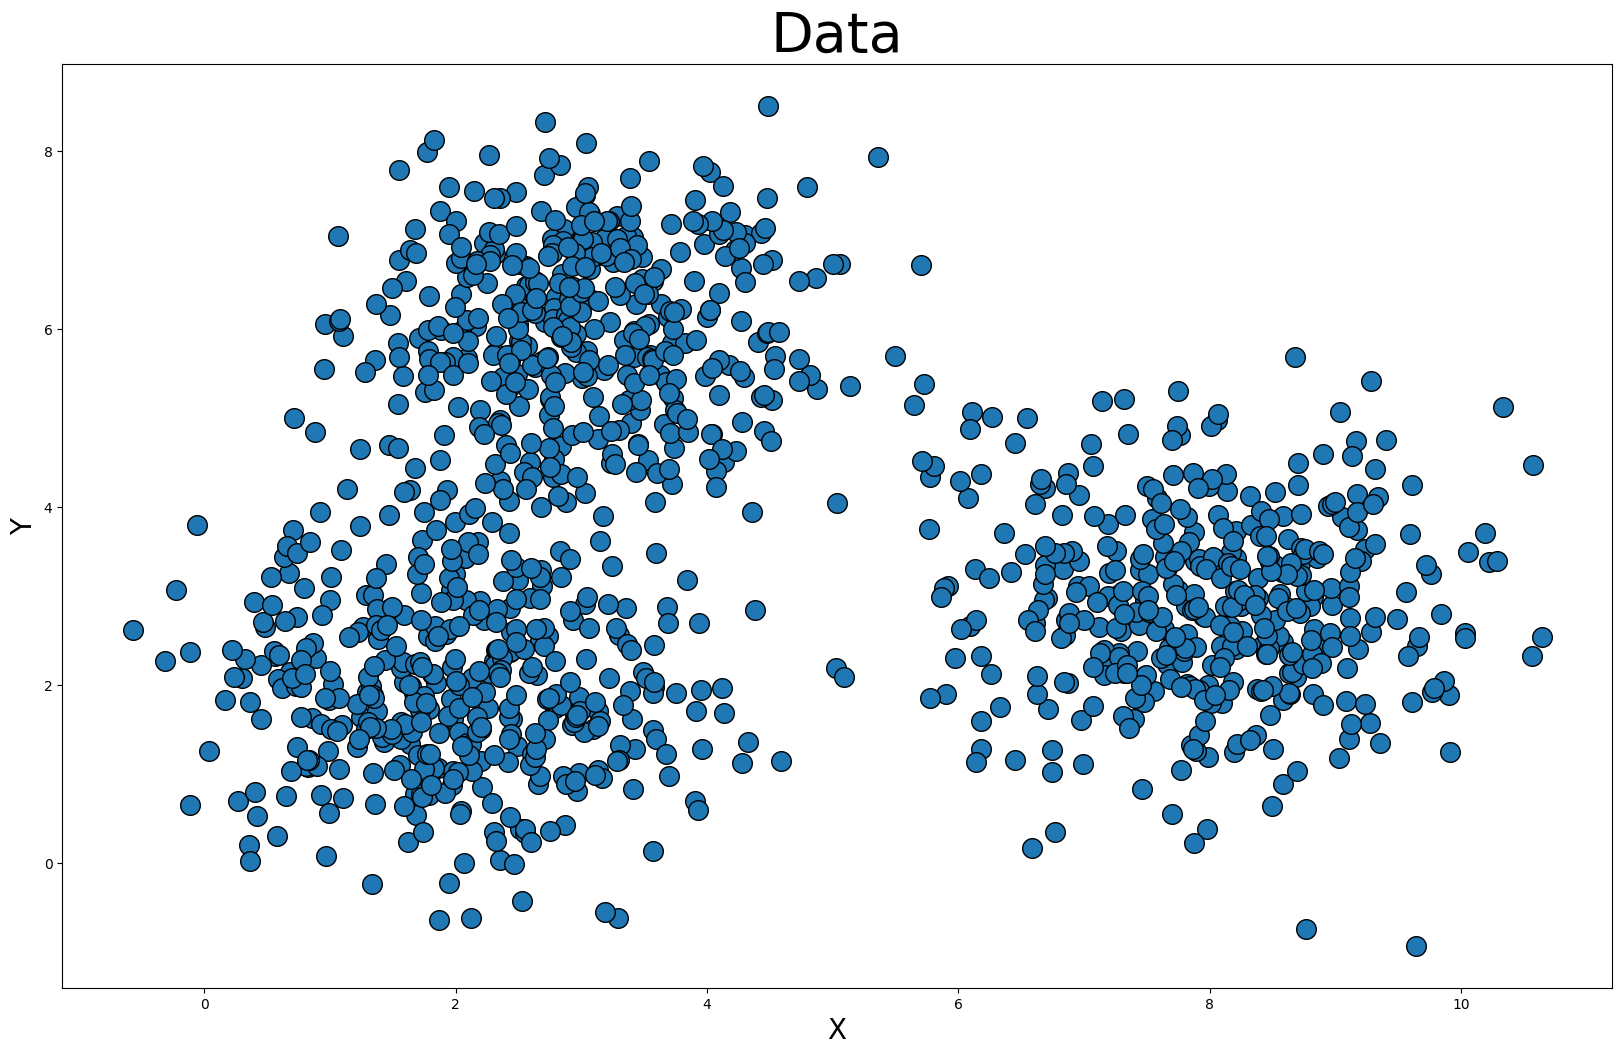

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(
    Data[:, 0], Data[:, 1],
    marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.title("Data", fontsize=40)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
y_pred =kmeans.fit_predict(Data)
centers=kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


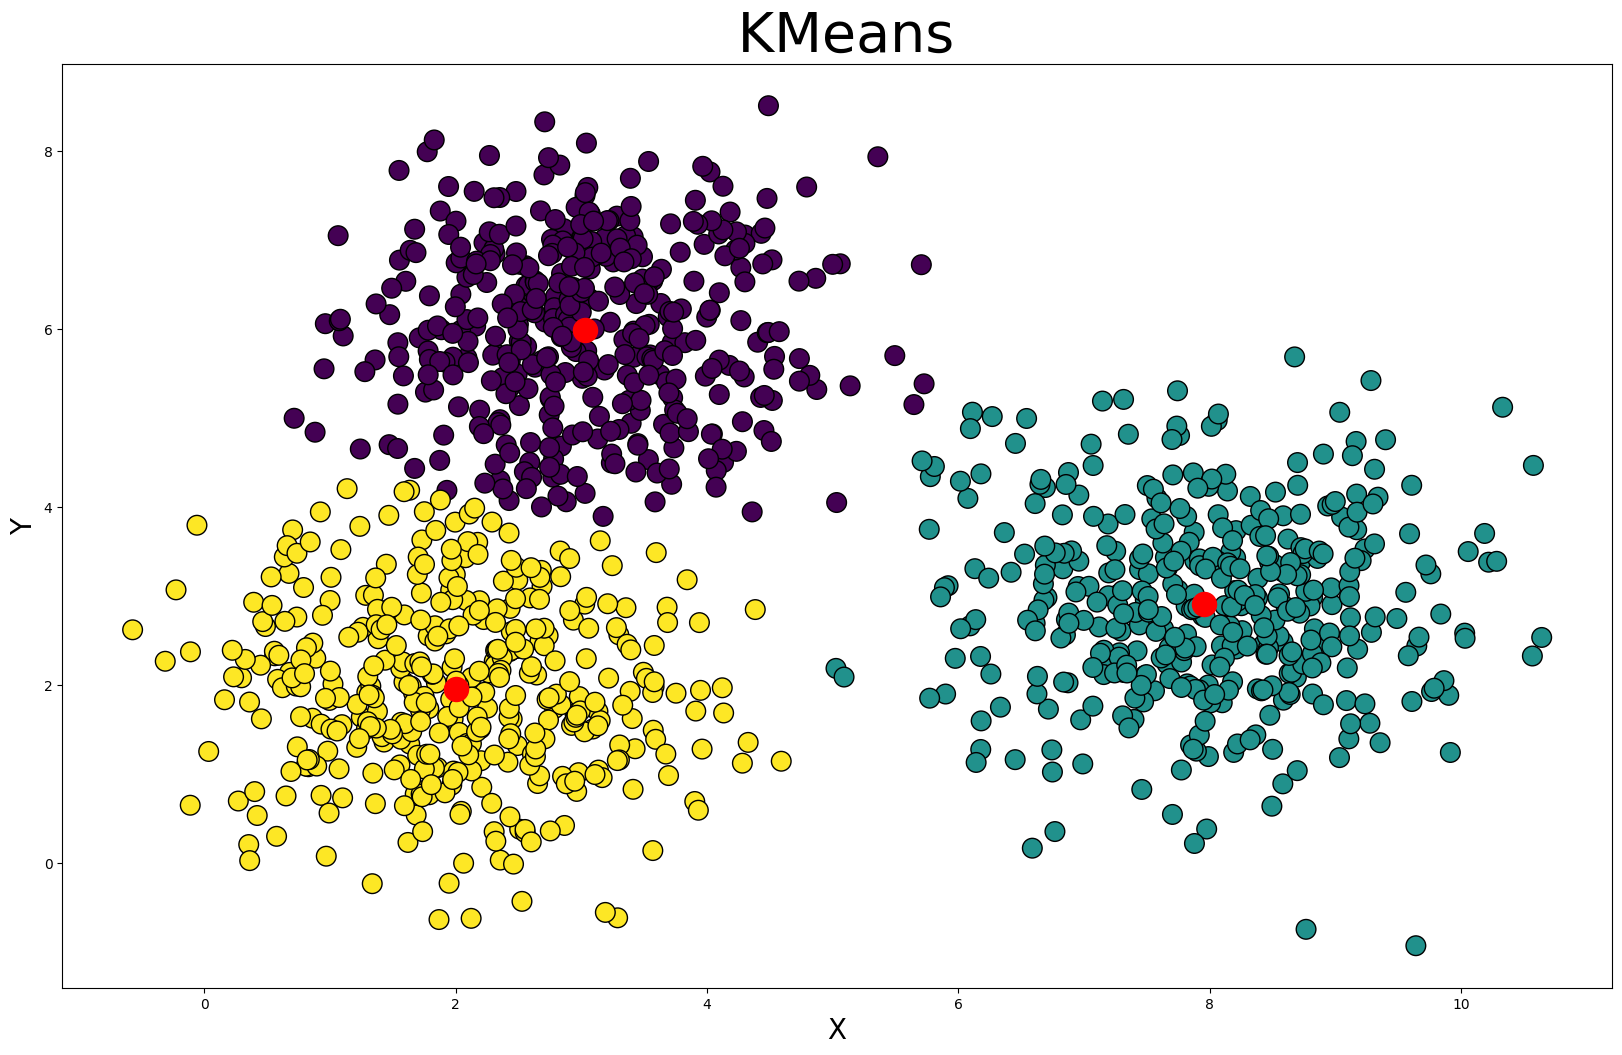

In [ ]:
# Show kết quả phân cụm
plt.figure(figsize=(20,12))
plt.scatter(
    Data[:, 0], Data[:, 1],
    c=y_pred, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.scatter(centers[:, 0], centers[:, 1], c='red',s=300)
plt.title(" KMeans", fontsize=40)
plt.show()

**Hạn chế của Kmeans**
* Chúng ta cần biết số lượng cluster cần clustering
* Nghiệm cuối cùng phụ thuộc vào các centers được khởi tạo ban đầu
---

#### Phương pháp Elbow cho giá trị tối ưu của k trong KMeans

Distorsion: Trung bình cộng bình phương khoảng cách giữa tâm cụm đến các điểm còn lại.

Một mô hình tốt là mô hình có giá trị distorsion thấp và số lượng cụm phù hợp. Tuy nhiên, khi số lượng cụm quá lớn, giá trị distorsion có thể không giảm nhiều nữa hoặc thậm chí tăng lên do sự phân tán của các điểm dữ liệu trong mỗi cụm. Do đó, để tìm một mô hình tốt, chúng ta cần tìm một sự cân bằng giữa giá trị distorsion và số lượng cụm phù hợp cho bộ dữ liệu.

Chọn số cụm hợp lý bằng cách: chọn điểm mà độ giảm distorsion bắt đầu chậm lại.

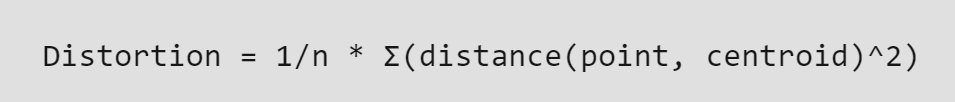

In [ ]:
distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Data[:,[0, 1]])
    distorsions.append(kmeans.inertia_)

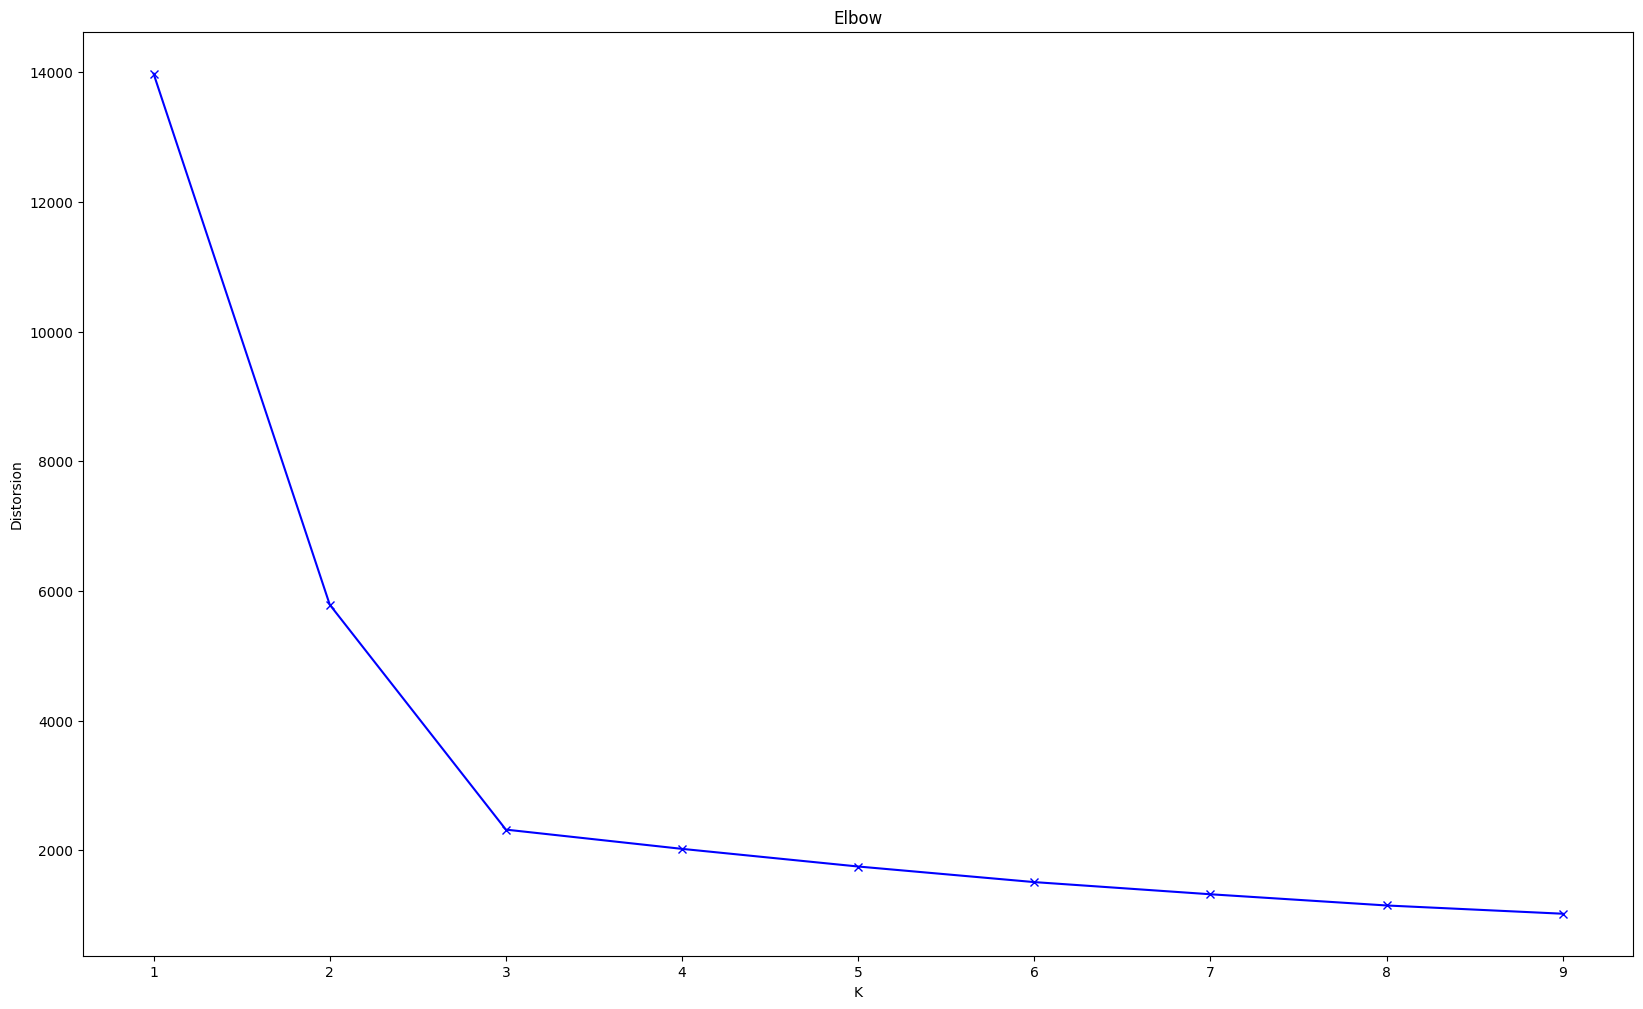

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(range(1,10),distorsions,'bx-')
plt.xlabel("K")
plt.ylabel("Distorsion")
plt.title("Elbow")
plt.show()

#### Silhouette coefficient

Silhouette_score =  (b-a)/max(a,b)

a: trung bình khoảng cách từ điểm hiện tại đến tất cả các điểm còn lại trong cluster

b: trung bình khoảng cách từ điểm hiện tại đến tất cả các điểm ở trong cluster gần nhất

In [ ]:
print(metrics.silhouette_score(Data,y_pred))
from sklearn.metrics.cluster import silhouette_score
k_values = []
silhouette_score_values = []

for i in range(2,10):
  kmeans = KMeans(n_clusters = i)
  y_pred = kmeans.fit_predict(Data)
  k_values.append(i)
  silhouette_score_values.append(metrics.silhouette_score(Data, y_pred))



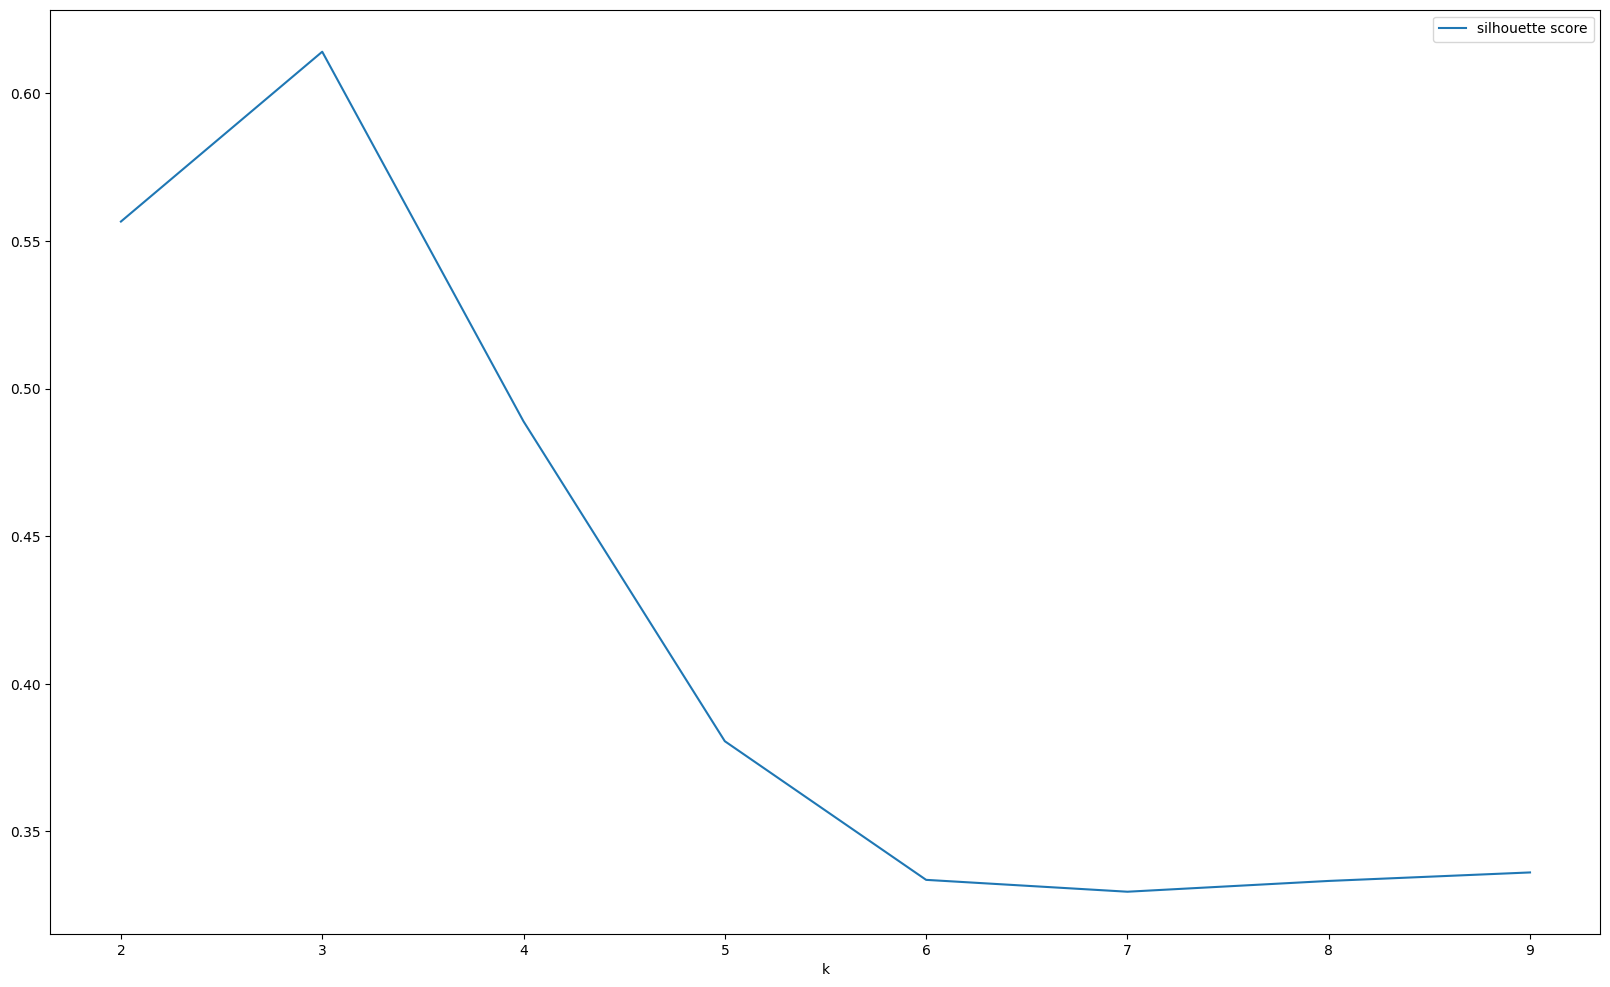

In [ ]:
result = pd.DataFrame({'k': k_values, 'silhouette score': silhouette_score_values})
result.plot.line(x='k', y = 'silhouette score', figsize=(20,12))
plt.show()

#  DBSCAN

eps : Nó xác định vùng lân cận xung quanh một điểm dữ liệu, tức là nếu khoảng cách giữa hai điểm nhỏ hơn hoặc bằng 'eps' thì chúng được coi là hàng xóm. Nếu giá trị eps được chọn quá nhỏ thì phần lớn dữ liệu sẽ được coi là ngoại lệ. Nếu nó được chọn rất lớn thì các cụm sẽ hợp nhất và phần lớn các điểm dữ liệu sẽ nằm trong cùng một cụm. Một cách để tìm giá trị eps dựa trên k-distance graph.

MinPts : Số lân cận tối thiểu (điểm dữ liệu) trong bán kính eps. Tập dữ liệu càng lớn thì phải chọn giá trị MinPts càng lớn. Giá trị tối thiểu của MinPts phải được chọn ít nhất là 3.


min_samples : Là MinPts nhưng tính điểm ở tâm

In [ ]:
#Doc file data
data = pd.read_csv("/content/drive/MyDrive/clustering/data/spiral.txt", sep="\t", header=None)
data_arr = np.array(data)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = data.iloc[:, 0:2].values
std = MinMaxScaler()
X_std = std.fit_transform(X)

In [ ]:
X.shape

(312, 2)

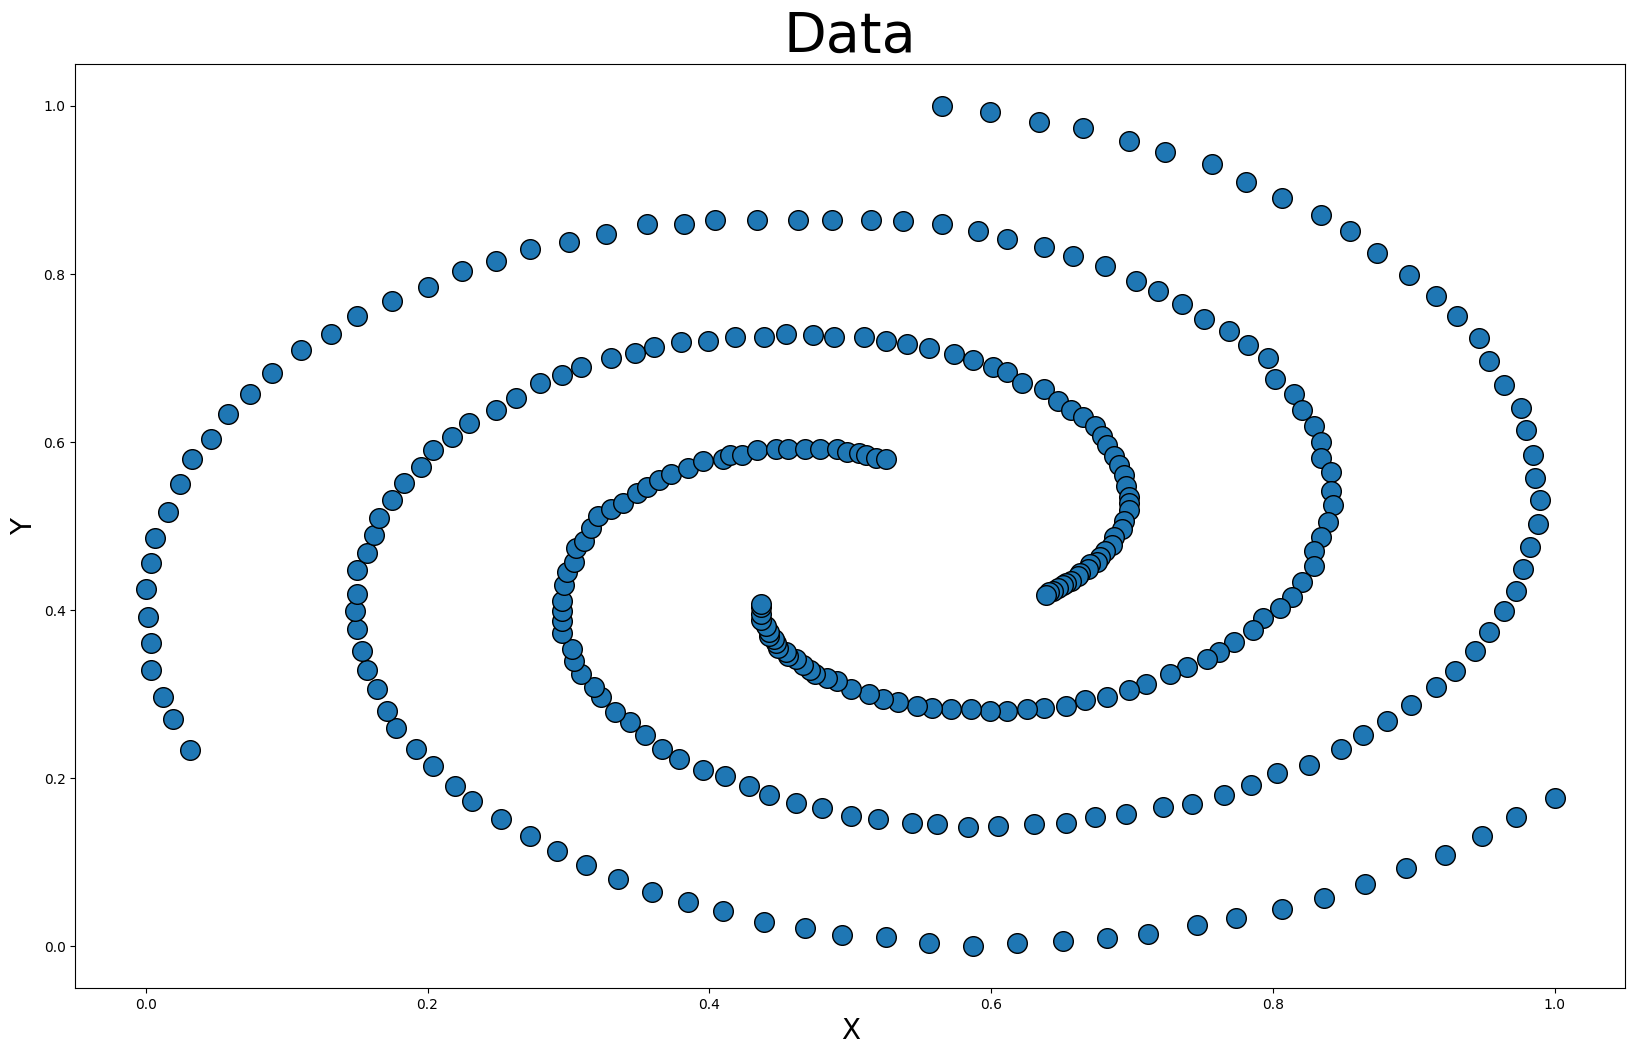

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(
    X_std[:, 0], X_std[:, 1],
     marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.title("Data", fontsize=40)
plt.show()

In [ ]:
db = DBSCAN(eps=0.07, min_samples=5).fit(X_std)
y_pred_DB = db.fit_predict(X_std)


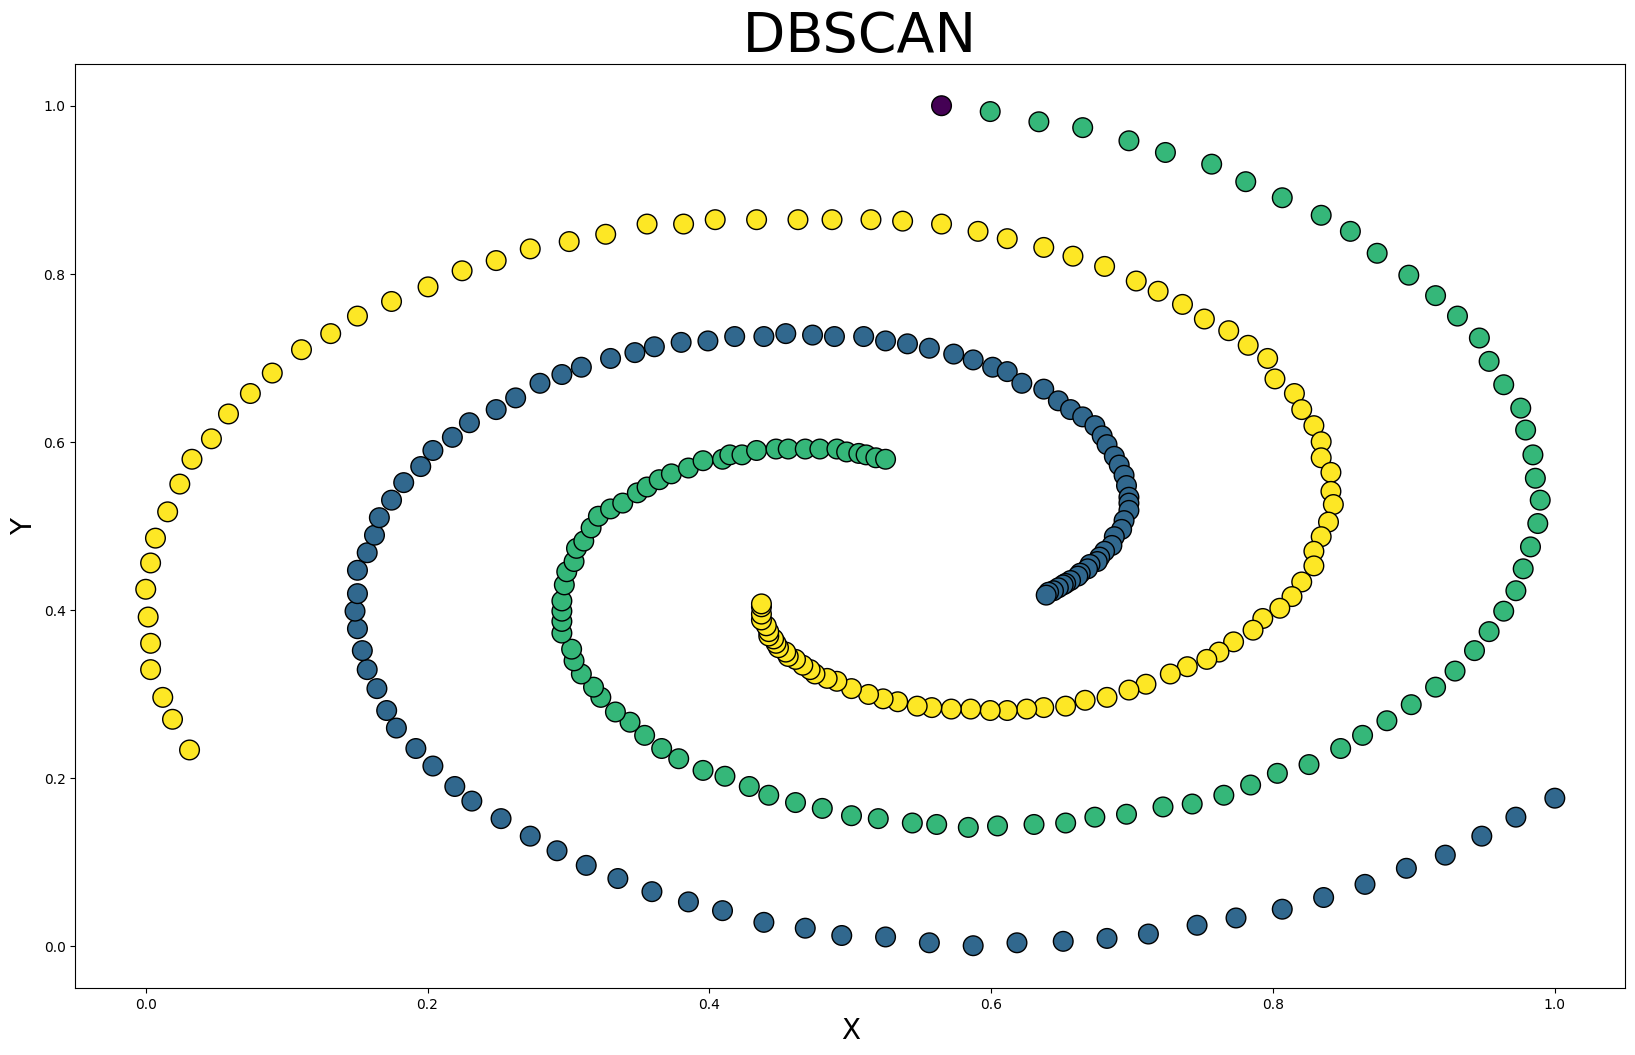

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(
    X_std[:, 0], X_std[:, 1],
    c=y_pred_DB, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.title(" DBSCAN", fontsize=40)
plt.show()

**Biểu đồ k-distance**

 Đây là biểu đồ thể hiện giá trị khoảng cách trong thuật toán k-Means clustering đến k điểm láng giềng gần nhất.

 Ứng với mỗi điểm chúng ta chỉ lựa chọn ra khoảng cách lớn nhất trong k
 khoảng cách. Những khoảng cách này trên đồ thị được sắp xếp theo thứ tự giảm dần. Các giá trị tốt của epsilon là vị trí mà biểu đồ này cho thấy xuất hiện một điểm khuỷ tay (elbow point):

 Nếu epsilon được chọn quá nhỏ, một phần lớn dữ liệu sẽ không được phân cụm và được xem là nhiễu; trong khi đối với giá trị epsilon quá cao, các cụm sẽ hợp nhất và phần lớn các điểm sẽ nằm trong cùng một cụm.

 Nói chung, các giá trị nhỏ của epsilon được ưu tiên hơn và theo quy tắc chung, chỉ một phần nhỏ các điểm nên nằm trong vùng lân cận epsilon.



Text(0.5, 1.0, 'Sorting Maximum Distance in k Nearest Neighbor of kNN')

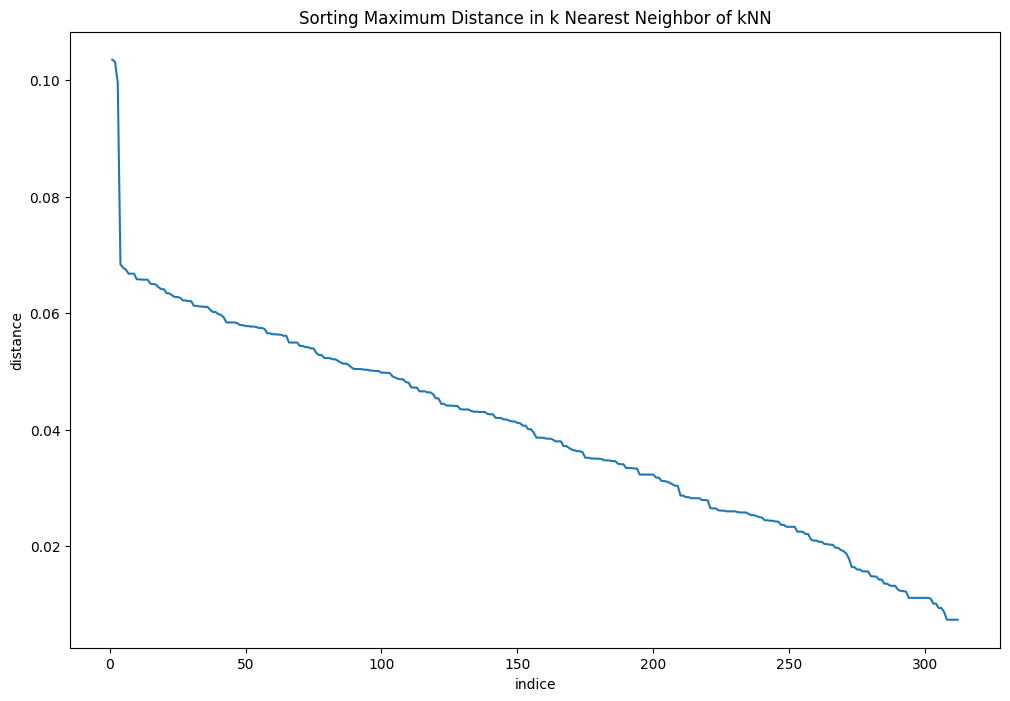

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Xây dựng mô hình k-Means với k=5
neighbors = 4
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(X_std)

# Ma trận khoảng cách distances: (N, k)
distances, indices = nbrs.kneighbors(X_std)

# Lấy ra khoảng cách xa nhất từ phạm vi láng giềng của mỗi điểm và sắp xếp theo thứ tự giảm dần.
distance_desc = sorted(distances[:, neighbors-1], reverse=True)

# Vẽ biểu đồ khoảng cách xa nhất ở trên theo thứ tự giảm dần
plt.figure(figsize=(12, 8))
plt.plot(list(range(1,len(distance_desc )+1)), distance_desc)
plt.ylabel('distance')
plt.xlabel('indice')
plt.title('Sorting Maximum Distance in k Nearest Neighbor of kNN')

# Hierarchical Clustering (phân cụm phân cấp)

* Phương pháp phân cụm phân cấp (Hierachical Clustering) không yêu cầu khai báo trước số lượng cụm.
* Thuật toán chỉ yêu cầu xác định trước thước đo về sự khác biệt giữa các cụm (không giao nhau), dựa trên sự khác biệt từng cặp giữa các quan sát trong hai cụm.
* Theo phương pháp này, chúng tạo ra những biểu diễn phân cấp trong đó các cụm ở mỗi cấp của hệ thống phân cấp được tạo bằng cách hợp nhất các cụm ở cấp độ thấp hơn bên dưới.

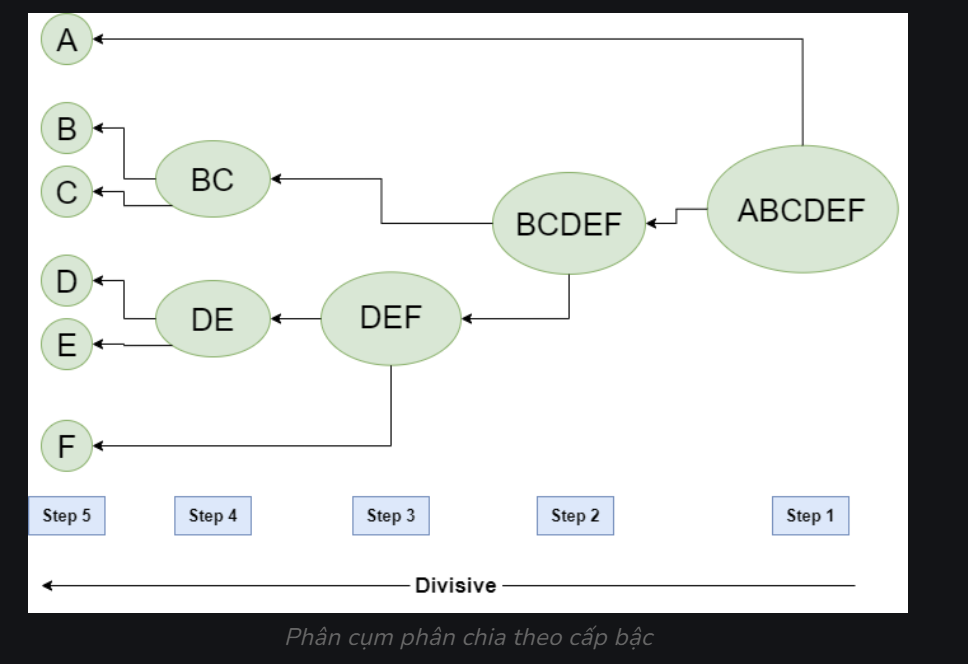

* Chiến lược hợp nhất: Chiến lược này sẽ đi theo chiều bottum-up (từ dưới lên trên). Quá trình phân cụm bắt đầu ở dưới cùng tại các node lá (còn gọi là leaf node hoặc termial node). Ban dầu mỗi quan sát sẽ được xem là một cụm tách biệt được thể hiện bởi một node lá. Ở mỗi level chúng ta sẽ tìm cách hợp một cặp cụm thành một cụm duy nhất nhằm tạo ra một cụm mới ở level cao hơn tiếp theo. Cụm mới này tương ứng với các node quyết định (non-leaf node). Như vậy sau khi hợp cụm thì số lượng cụm ít hơn. Một cặp được chọn để hợp nhất sẽ là những cụm trung gian không giao nhau.

* Chiến lược phân chia: Chiến lược này sẽ thực hiện theo chiều top-down. Tức là phân chia bắt đầu từ node gốc của đồ thị. Node gốc bao gồm toàn bộ các quan sát, tại mỗi level chúng ta phân chia một cách đệ qui các cụm đang tồn tại tại level đó thành hai cụm mới. Phép phân chia được tiến hành sao cho tạo thành hai cụm mới mà sự tách biệt giữa chúng là lớn nhất. Sự tách biệt này sẽ được đo lường thông qua một thước đo khoảng cách mà ta sẽ tìm hiểu kĩ hơn bên dưới.

# Gaussian Mixture Model

Gaussian Mixture Model (viết tắt GMM) là một mô hình phân cụm thuộc lớp bài toán học không giám sát mà phân phối xác suất của mỗi một cụm được giả định là phân phối Gassian đa chiều. Sở dĩ mô hình được gọi là Mixture là vì xác suất của mỗi điểm dữ liệu không chỉ phụ thuộc vào một phân phối Gaussian duy nhất mà là kết hợp từ nhiều phân phối Gaussian khác nhau từ mỗi cụm.

Mục tiêu của mô hình GMM là ước lượng tham số phù hợp nhất cho
k cụm thông qua phương pháp ước lượng hợp lý tối đa.



Đối với Phân phối Gaussian Đa biến (giả sử là d-variate), hàm mật độ xác suất có công thức:

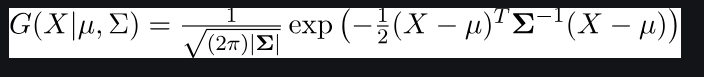

Trong đó, 𝒰 là vector d chiều gọi là vector giá trị thực và ∑ là ma trận hiệp phương sai.

Giả sử có K cụm thì giá trị μ và ∑ cũng phải được ước tính cho mỗi K.

Trong mô hình này, sử dụng thuật toán EM (Expectation-Maximization) để cập nhật dần dần nghiệm cho bài toán.

Trong thuật toán EM chúng ta liên tục thực hiện các vòng lặp mà mỗi vòng lặp bao gồm hai bước huấn luyện chính:

* E-Step: Ước lượng phân phối của biến ẩn thể hiện phân phối xác suất của các cụm tương ứng với dữ liệu và bộ tham số phân phối.

* M-Step: Tối đa hoá phân phối xác suất đồng thời (join distribution probability) của dữ liệu và biến ẩn.

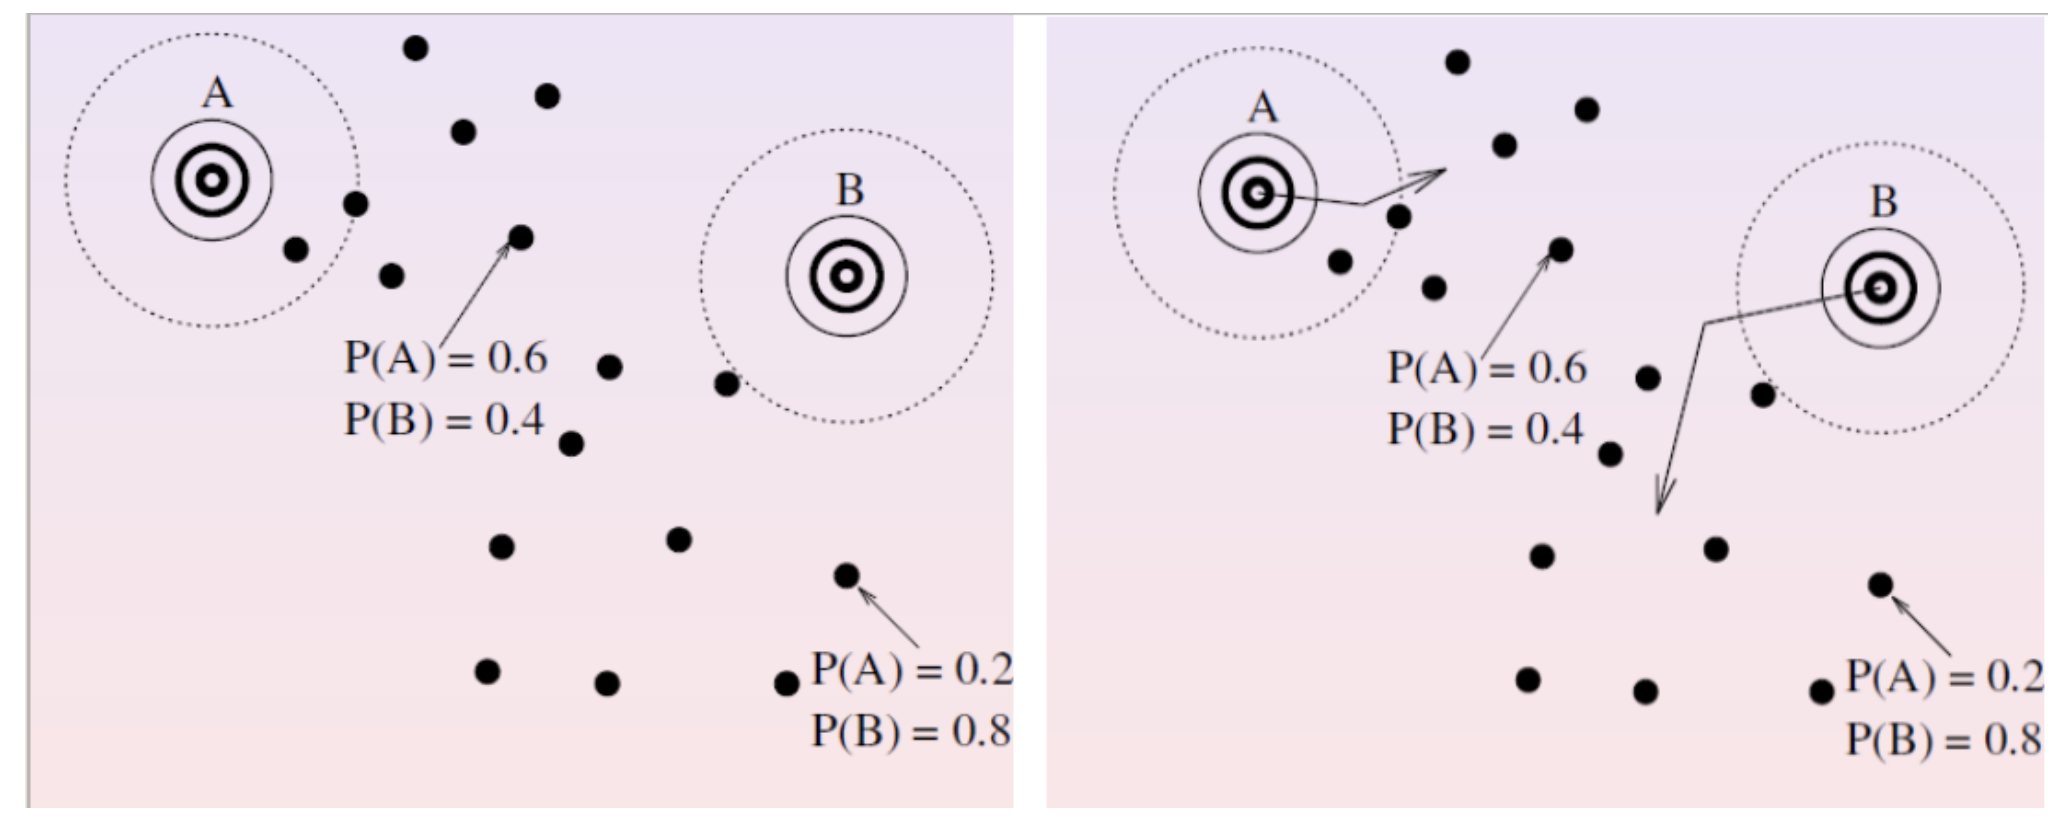